In [ ]:
!nvidia-smi

Sat Sep 23 13:56:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Install YOLOv8**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.0/618.0 kB 10.1 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/ultralytics/ultralytics  # clone
%cd ultralytics
%pip install -r requirements.txt  # install
%pip install -q roboflow
import torch
import os
from IPython.display import Image, clear_output
print(f"setup complete using torch {torch.__version__}({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'cpu'})")

Cloning into 'ultralytics'...
remote: Enumerating objects: 16179, done.
remote: Counting objects: 100% (809/809), done.
remote: Compressing objects: 100% (542/542), done.
remote: Total 16179 (delta 509), reused 438 (delta 265), pack-reused 15370
Receiving objects: 100% (16179/16179), 8.75 MiB | 20.21 MiB/s, done.
Resolving deltas: 100% (11157/11157), done.
/content/ultralytics
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 782.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 

# **Add the Dataset**

In [ ]:
!pip install roboflow

from roboflow import Roboflow

# Replace 'YOUR_API_KEY' with your actual Roboflow API key
api_key = "64Ai4g468N0RiU6Q1ClX"

rf = Roboflow(api_key=api_key, model_format="yolov8", notebook="ultralytics")


In [ ]:
import os
from roboflow import Roboflow

os.environ["DATASET_DIRECTORY"] = "/content"

try:
    rf = Roboflow(api_key="64Ai4g468N0RiU6Q1ClX")
    project = rf.workspace("jankiben-riteshbhai-y3ind").project("objectdetectionofmobileui")
    dataset = project.version(1).download("yolov8")
    print("Dataset downloaded successfully.")
except Exception as e:
    print(f"Error: {str(e)}")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.184, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to /content/ObjectdetectionOfMobileUI-1 in yolov8:: 100%|██████████| 372/372 [00:00<00:00, 4697.29it/s]

Dataset downloaded successfully.


# **Model Training**

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m.yaml')  # build a new model from YAML
model = YOLO('yolov8m.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8m.yaml').load('yolov8m.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/ObjectdetectionOfMobileUI-1/data.yaml', epochs=100, imgsz=640)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

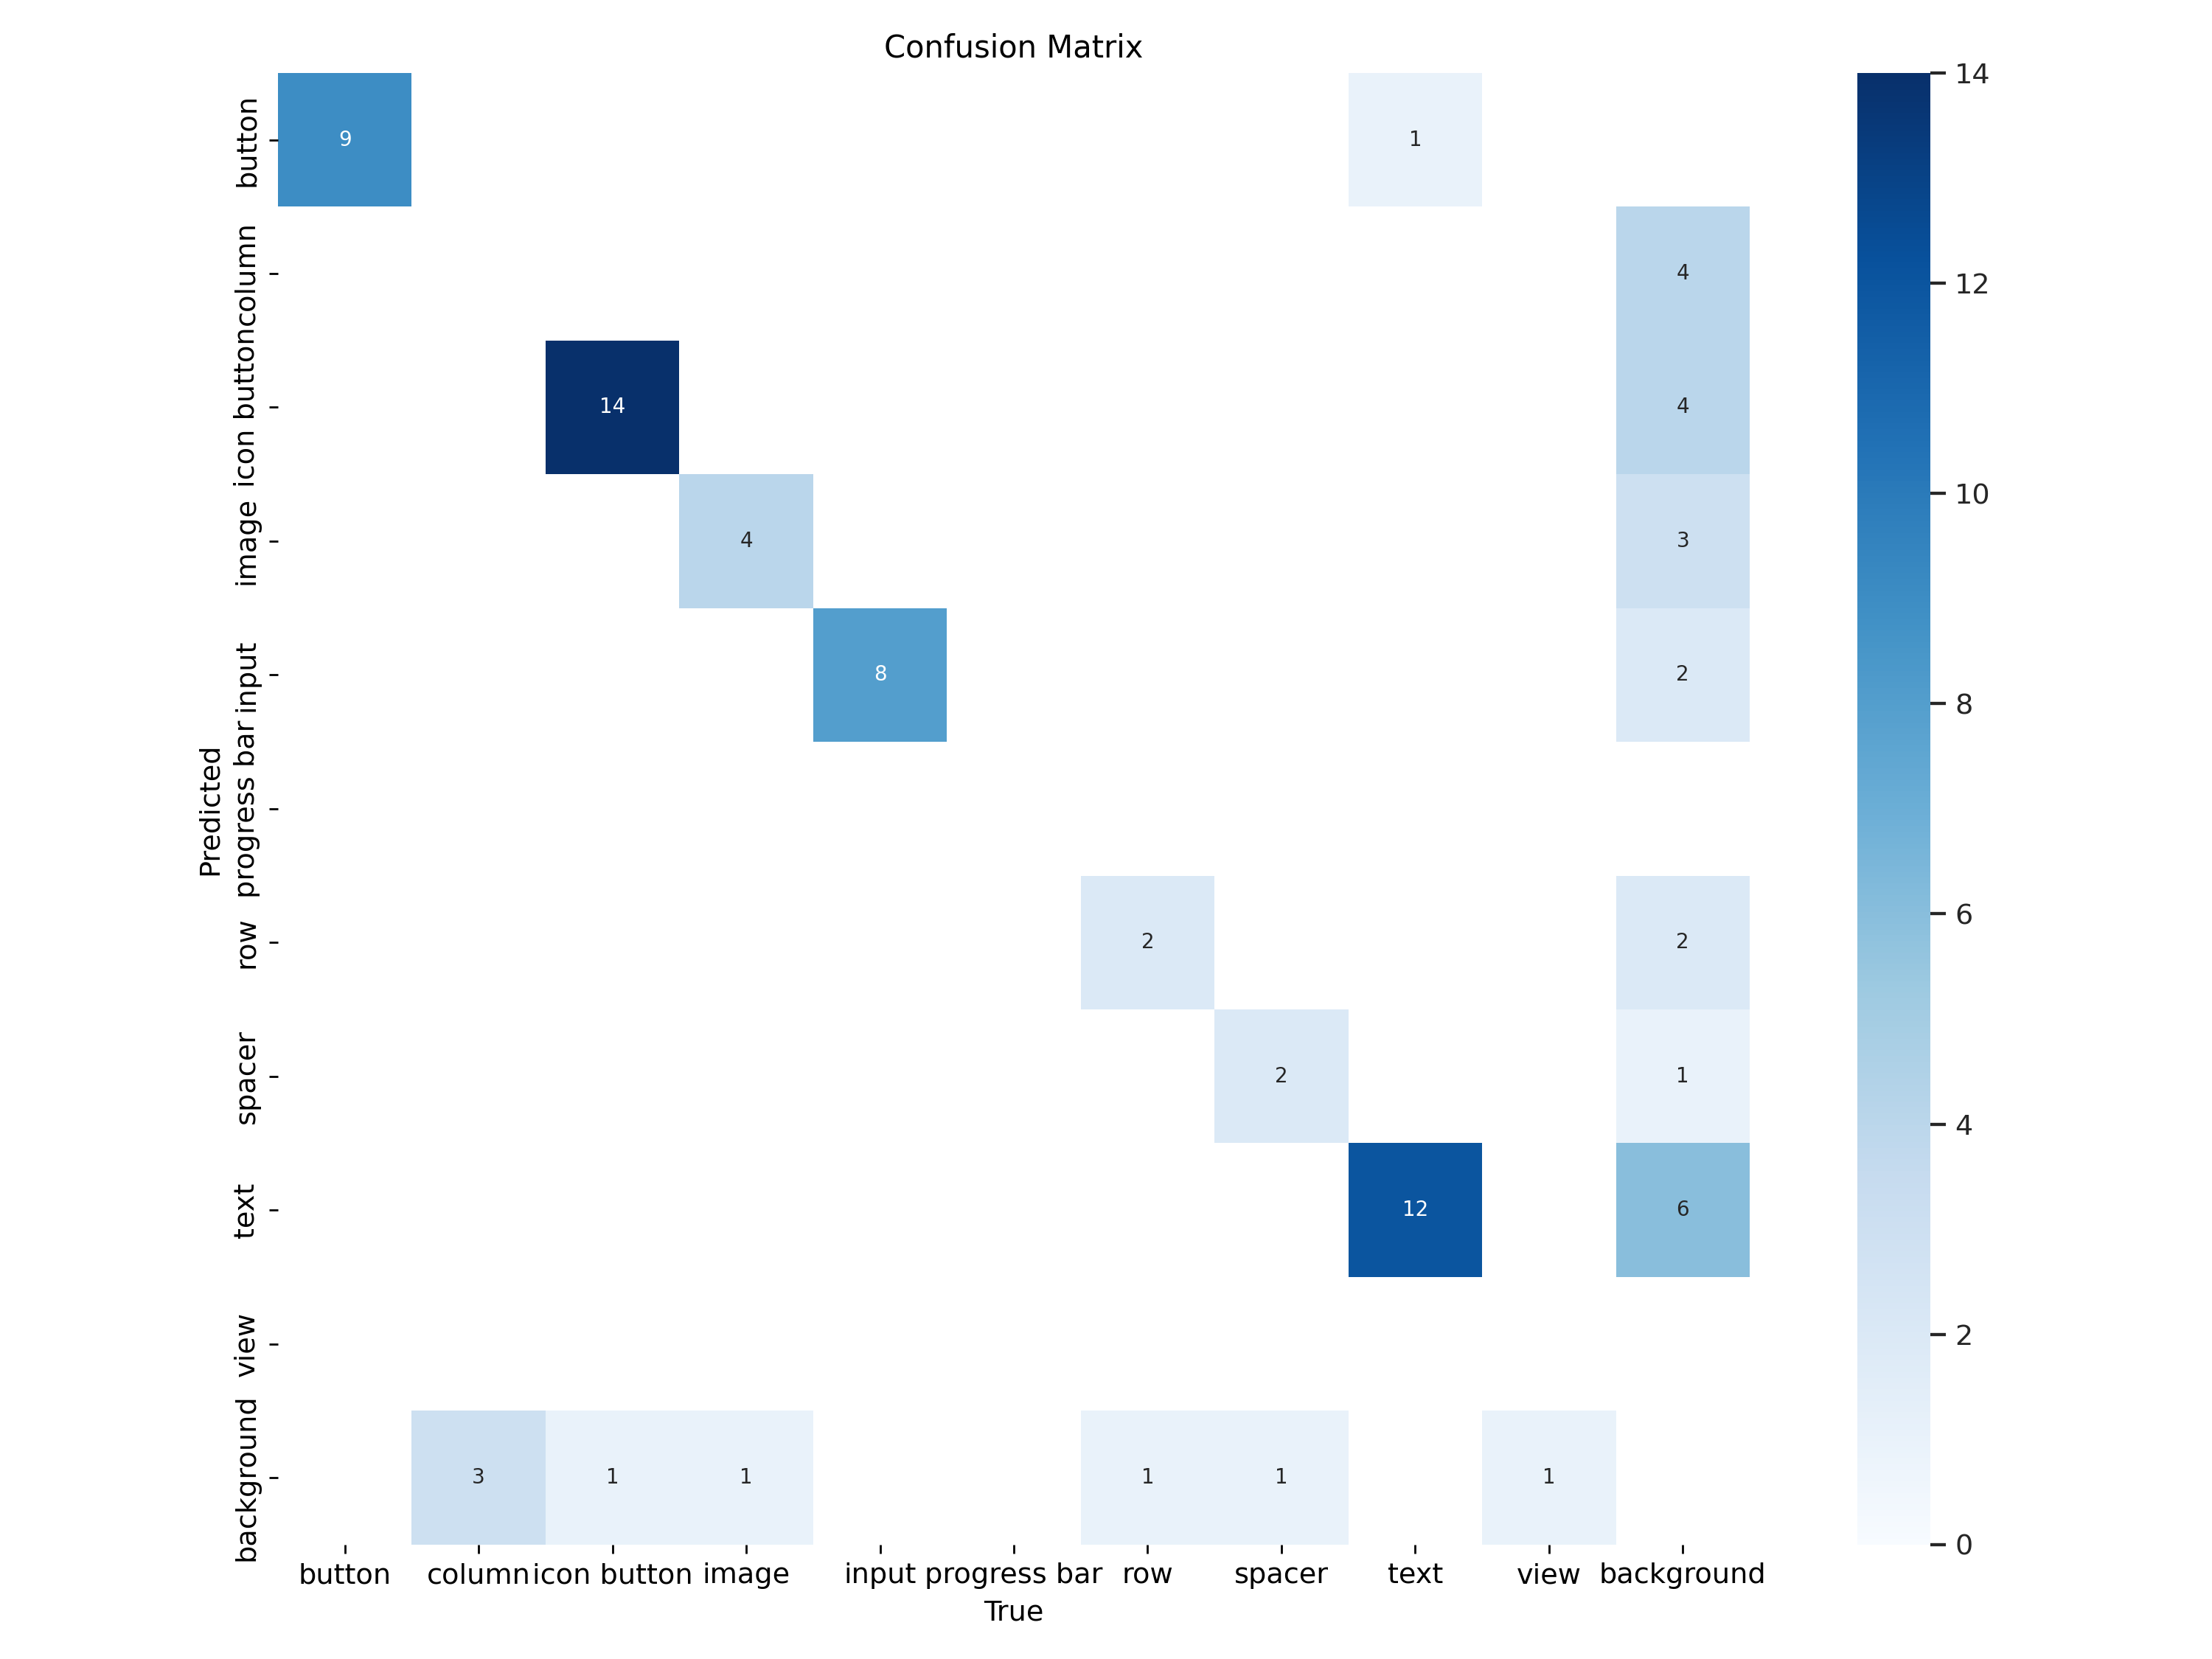

In [ ]:
Image(filename=f'/content/ultralytics/runs/detect/train2/confusion_matrix.png', width=700)

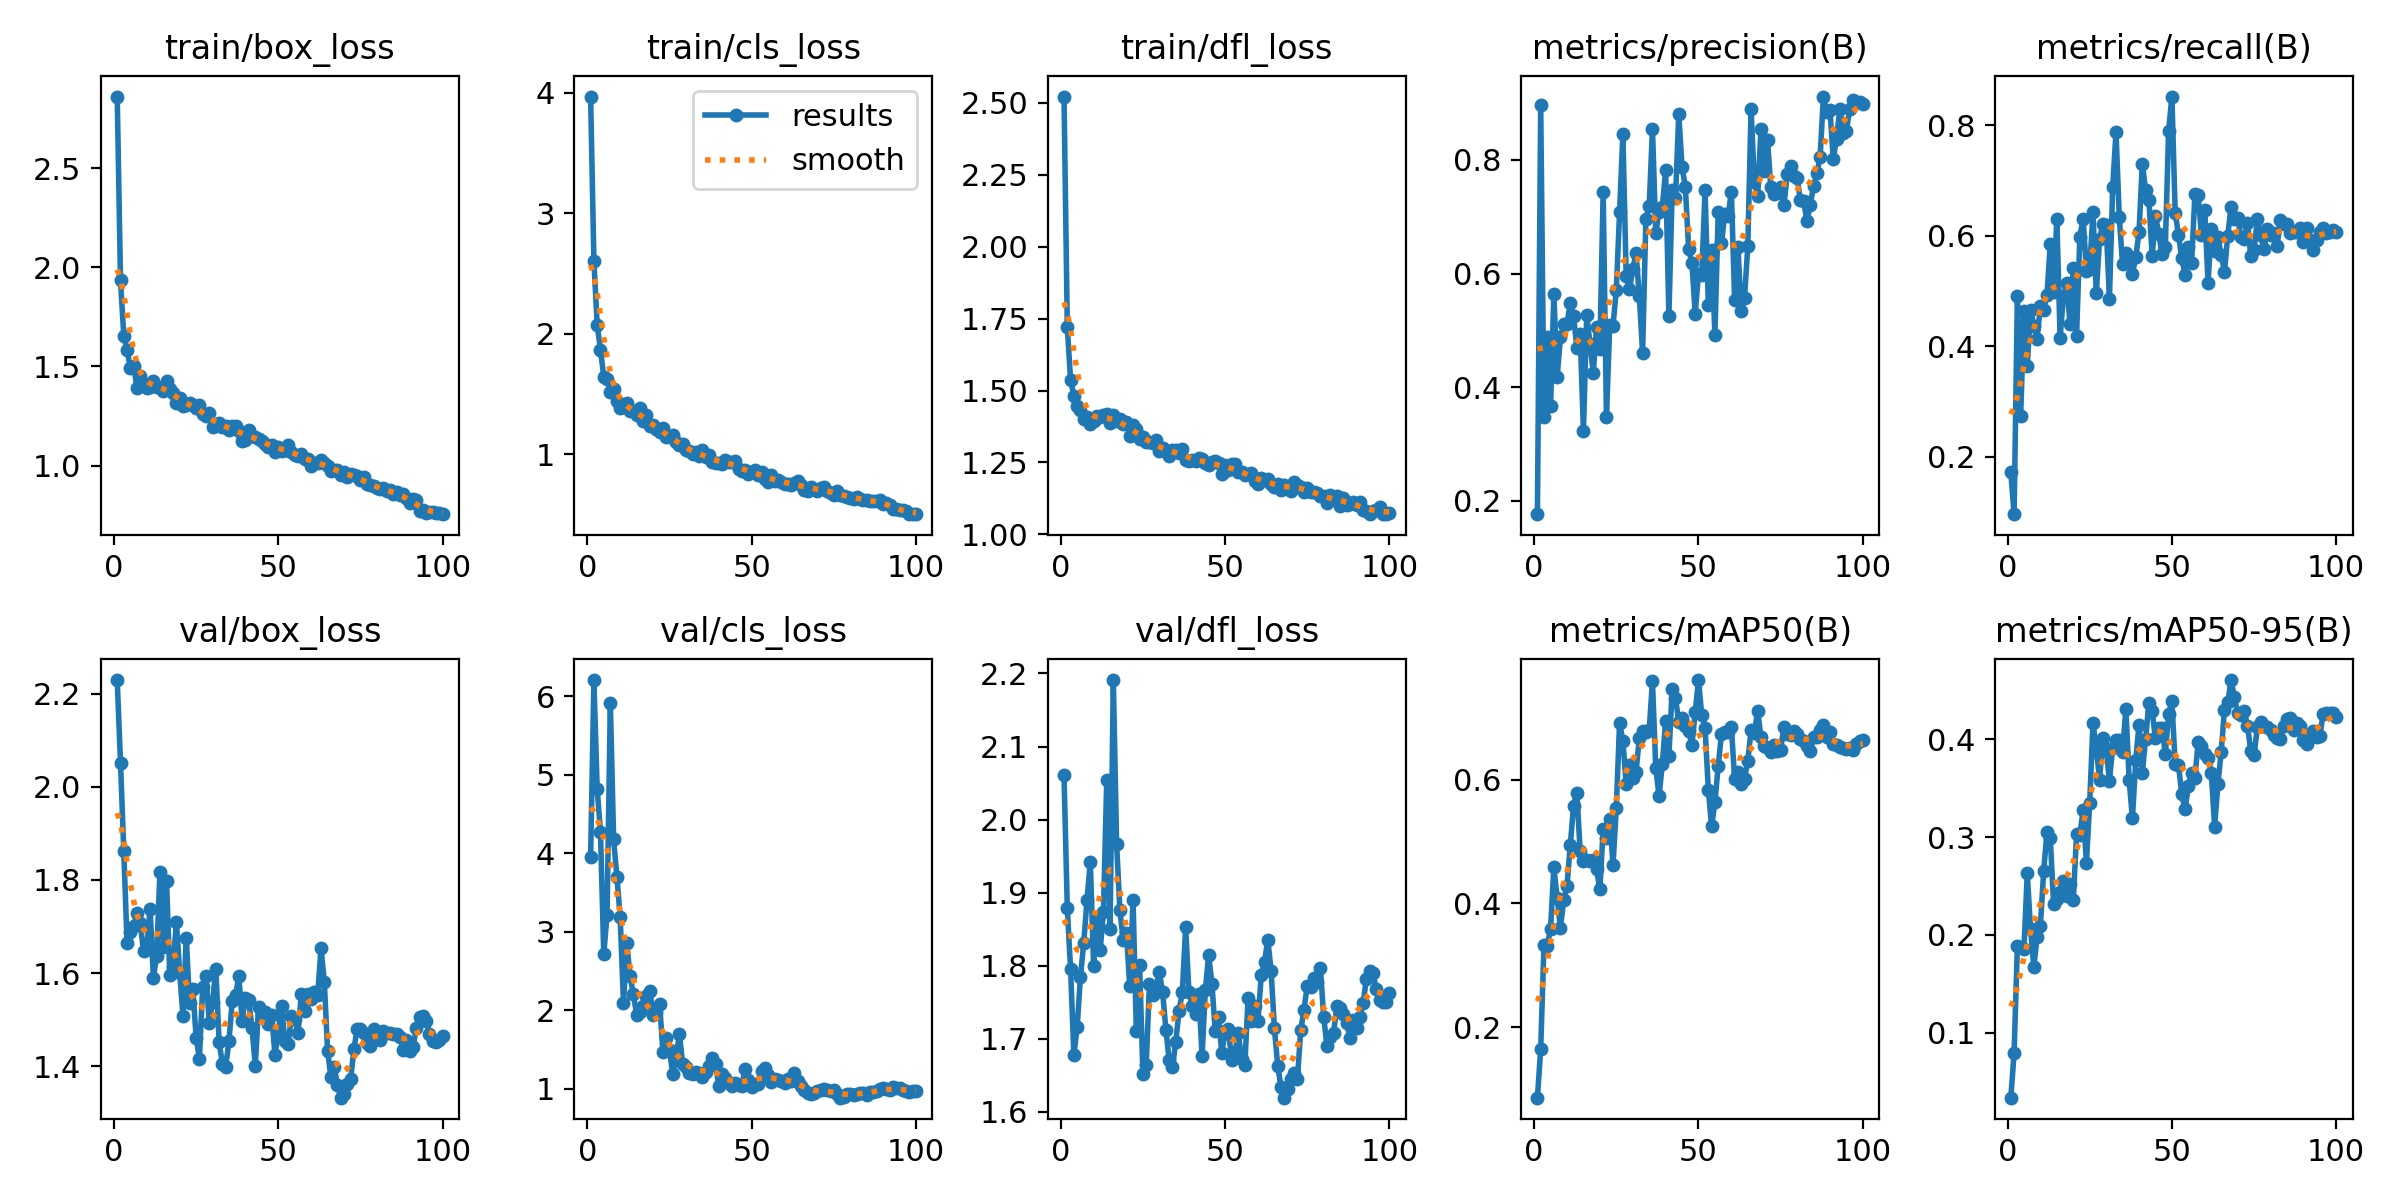

In [ ]:
Image(filename=f'/content/ultralytics/runs/detect/train2/results.png', width=800)

# **Model Validation**

In [ ]:
# Load a model
model = YOLO('yolov8m.pt')  # load an official model
model = YOLO('/content/ultralytics/runs/detect/train2/weights/best.pt')  # load a custom model

# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25845550 parameters, 0 gradients
val: Scanning /content/ObjectdetectionOfMobileUI-1/valid/labels.cache... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]
                   all          9         60      0.737      0.653      0.712      0.462
                button          9          9      0.931          1      0.995      0.712
                column          9          3          0          0      0.119     0.0441
           icon button          9         15      0.794      0.867      0.945      0.559
                 image          9          5      0.553        0.8      0.736      0.519
                 input          9          8      0.999      0.875      0.982      0.631
                   row   

array([     0.7125,    0.044088,     0.55937,     0.51939,     0.63068,     0.46242,     0.61067,     0.46113,     0.58412,      0.0398])

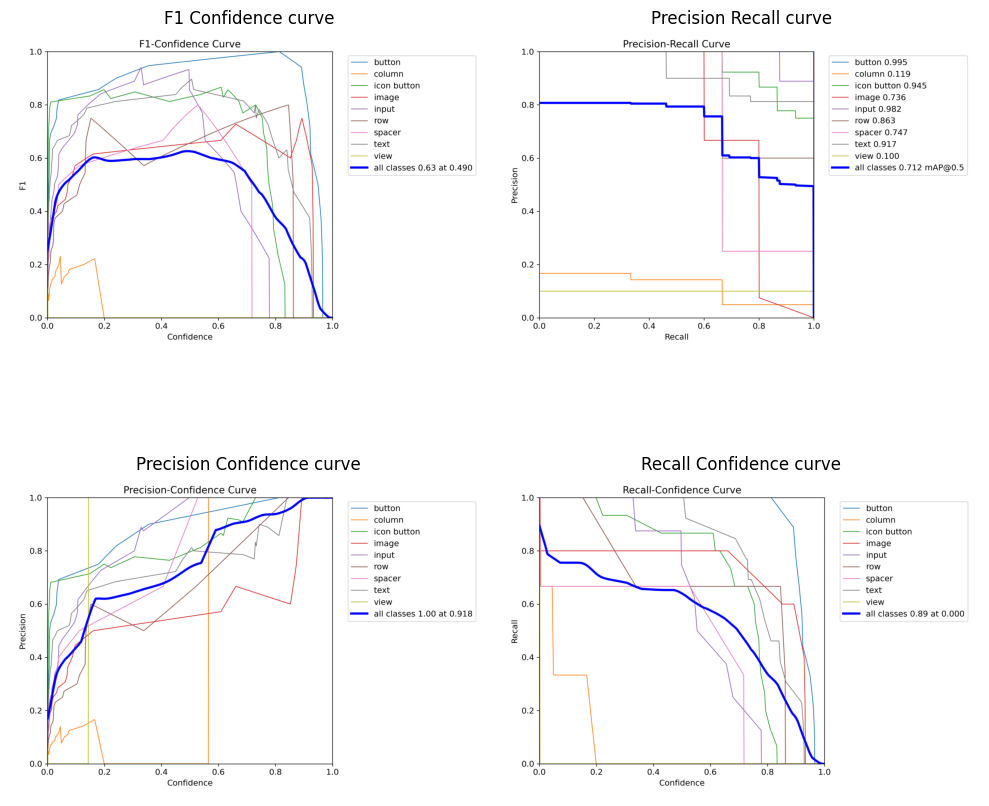

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Directory containing the images
image_dir = '/content/ultralytics/runs/detect/val'

# List of image filenames and corresponding titles
image_files = ['F1_curve.png', 'PR_curve.png', 'P_curve.png', 'R_curve.png']
image_titles = ['F1 Confidence curve', 'Precision Recall curve', 'Precision Confidence curve', 'Recall Confidence curve']

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop through image files and titles, and display them in the subplot
for i, (image_file, title) in enumerate(zip(image_files, image_titles)):
    row = i // 2
    col = i % 2
    img_path = os.path.join(image_dir, image_file)
    img = mpimg.imread(img_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(title)

# Removing axis labels and adjust layout
for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()

# Show the subplot
plt.show()

# **Model Testing**

In [ ]:
#code is for if get UTH error
#import locale
#print(locale.getpreferredencoding())

ANSI_X3.4-1968


In [ ]:
#import locale
#def getpreferredencoding(do_setlocale = True):
#    return "UTF-8"
#locale.getpreferredencoding = getpreferredencoding

In [28]:
#  inference on testing dataset
PATH="/content/ultralytics/runs/detect/train2"
!yolo task=detect mode=predict model='/content/ultralytics/runs/detect/train2/weights/best.pt' save_txt=True conf=0.5 save_conf=True source='/content/ObjectdetectionOfMobileUI-1/test/images'

Ultralytics YOLOv8.0.184 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25845550 parameters, 0 gradients

image 1/27 /content/ObjectdetectionOfMobileUI-1/test/images/125_png.rf.b8c5dea74223a1bdb4571cc4d604e678.jpg: 640x640 2 inputs, 2 texts, 41.3ms
image 2/27 /content/ObjectdetectionOfMobileUI-1/test/images/128_png.rf.caec567105988beb43fceb7bcd1d95b9.jpg: 640x640 2 buttons, 3 texts, 36.3ms
image 3/27 /content/ObjectdetectionOfMobileUI-1/test/images/129_png.rf.63569bf12ca645f7ef5d230abe2dc8dd.jpg: 640x640 1 button, 1 image, 2 texts, 36.2ms
image 4/27 /content/ObjectdetectionOfMobileUI-1/test/images/13_png.rf.39f6c4dd33b2ebd6a3e37e3ccdbe1c9f.jpg: 640x640 1 button, 1 icon button, 1 input, 2 texts, 1 view, 36.2ms
image 5/27 /content/ObjectdetectionOfMobileUI-1/test/images/140_png.rf.e03f7651ddda28c3de9ffe209f973914.jpg: 640x640 2 columns, 4 rows, 1 text, 10 views, 36.2ms
image 6/27 /content/ObjectdetectionOfMobileUI-1/test/images/14_png.

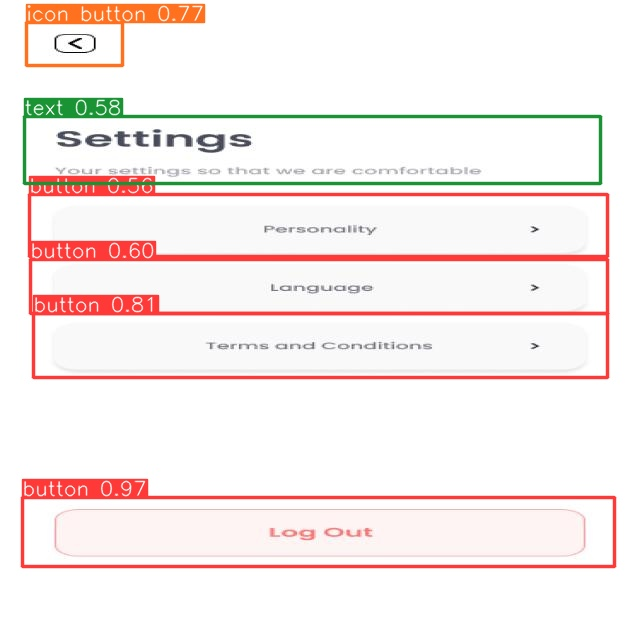

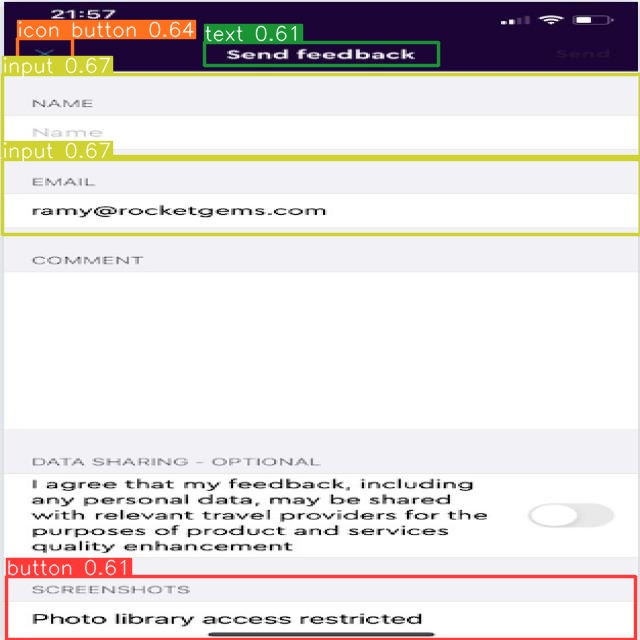

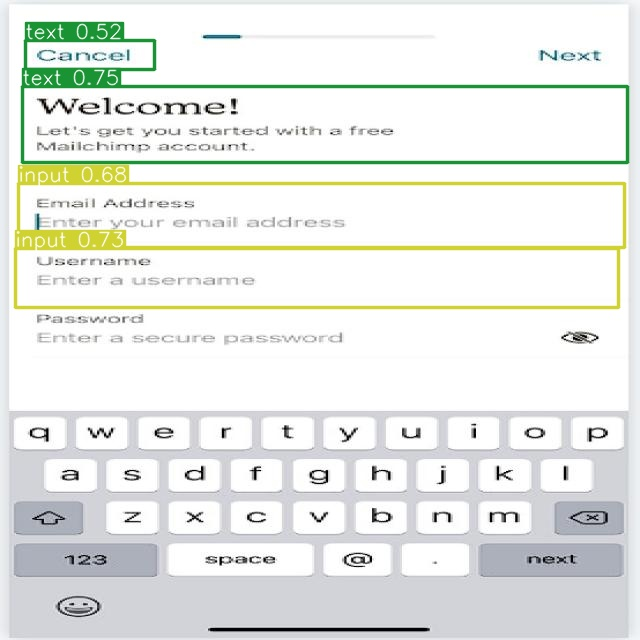

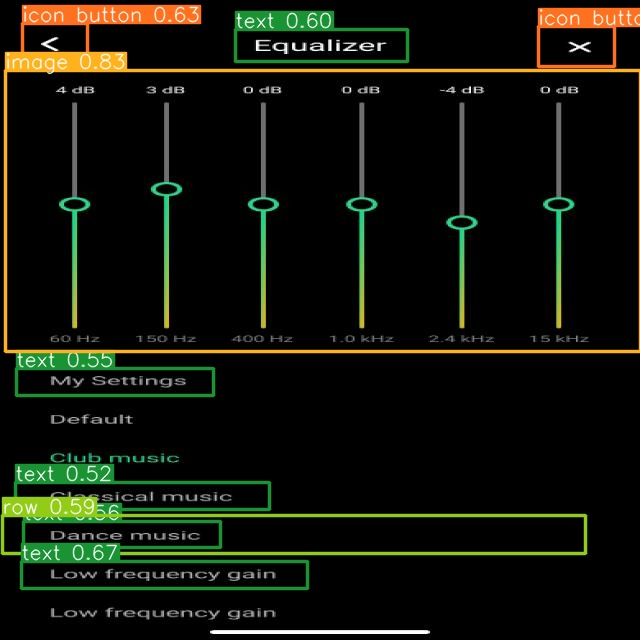

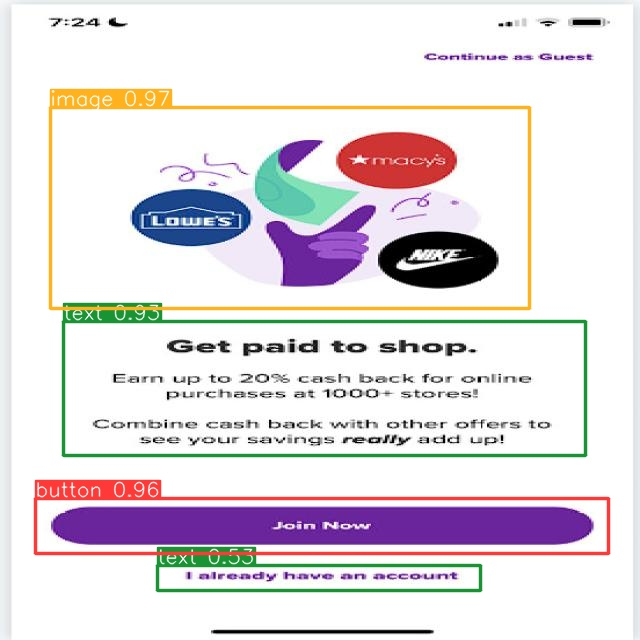

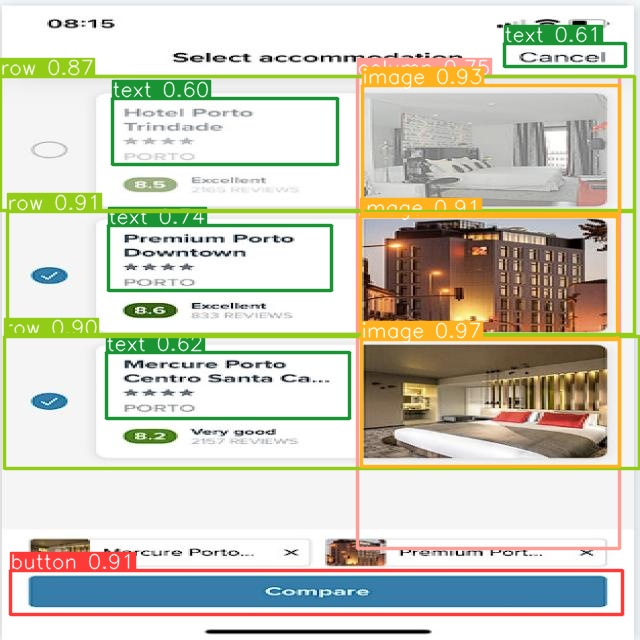

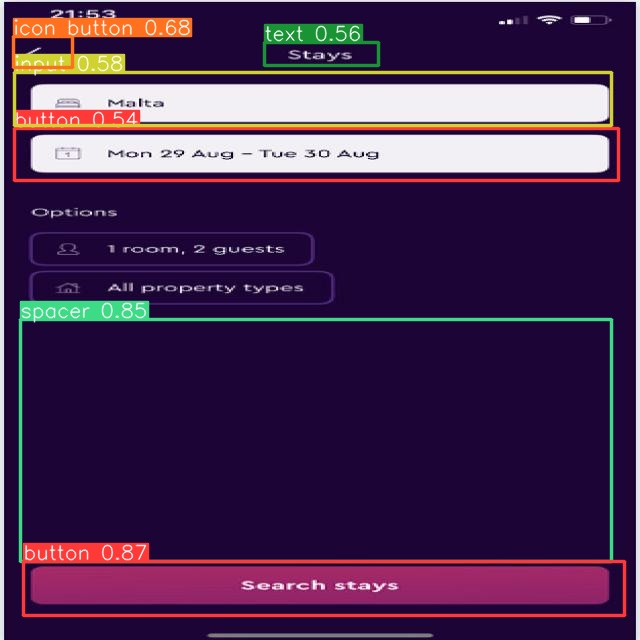

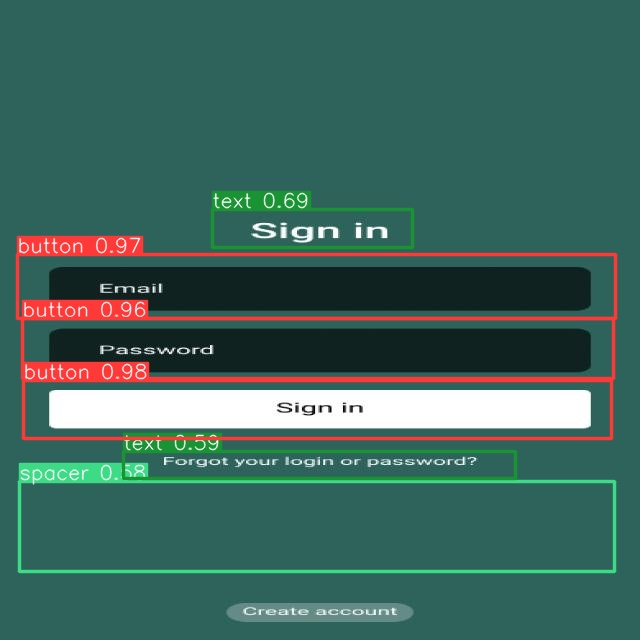

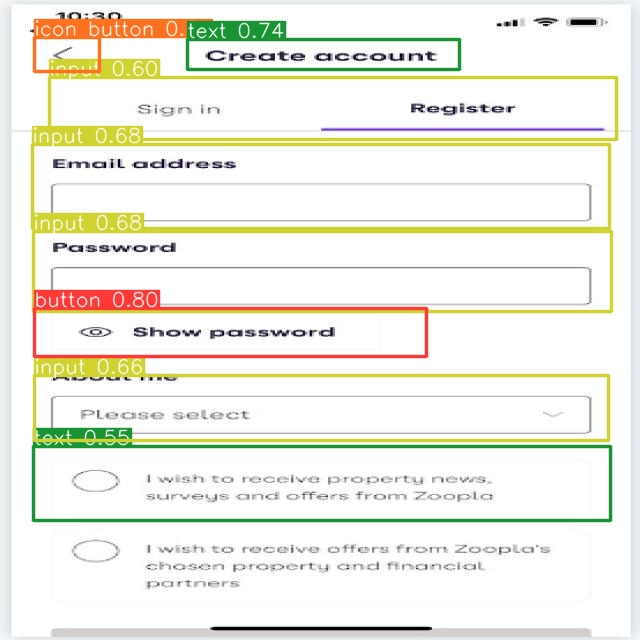

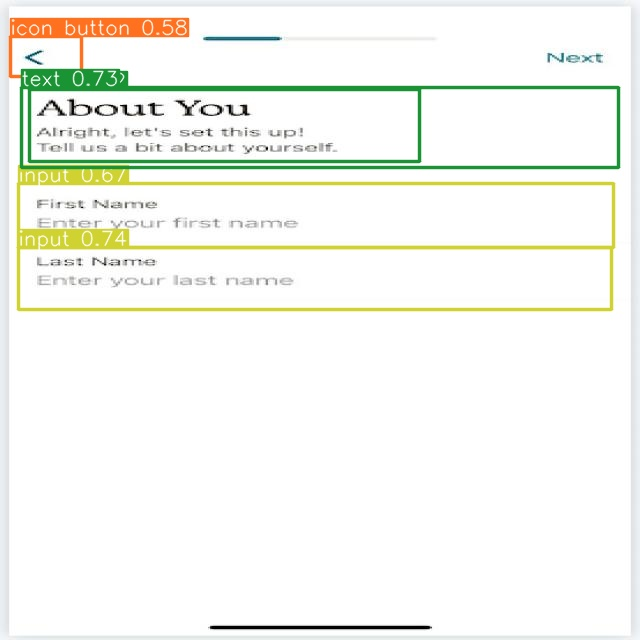

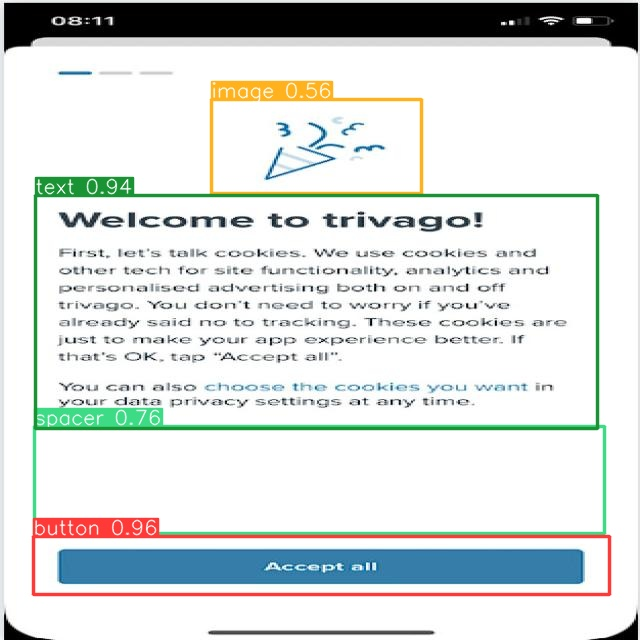

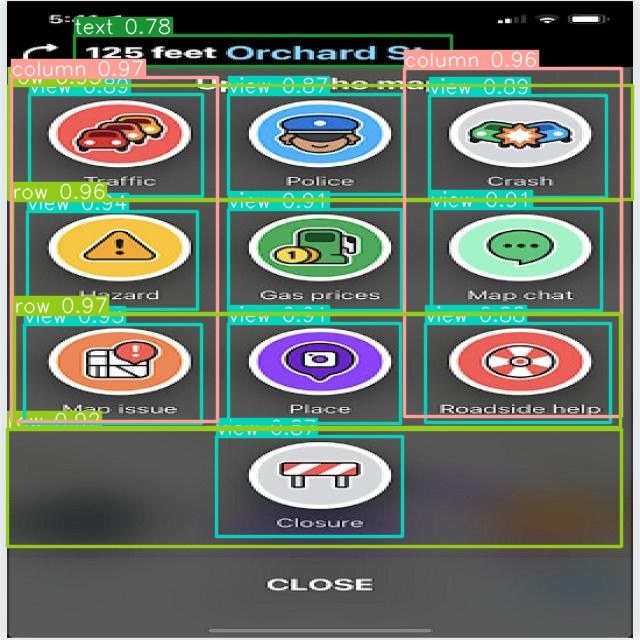

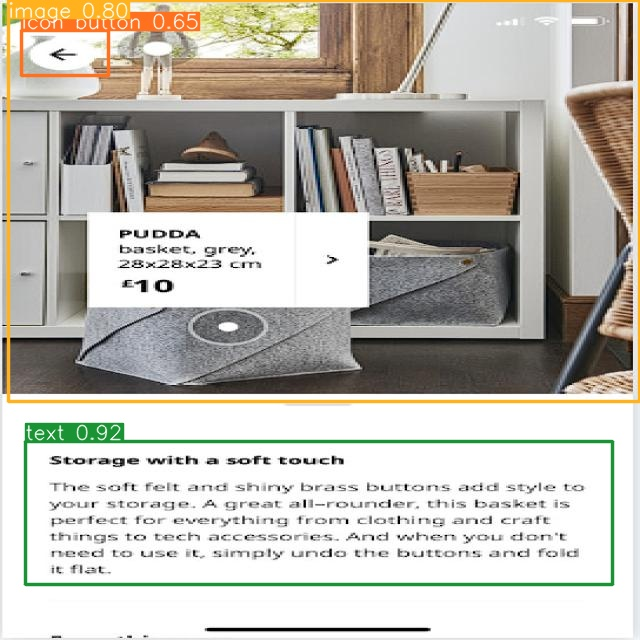

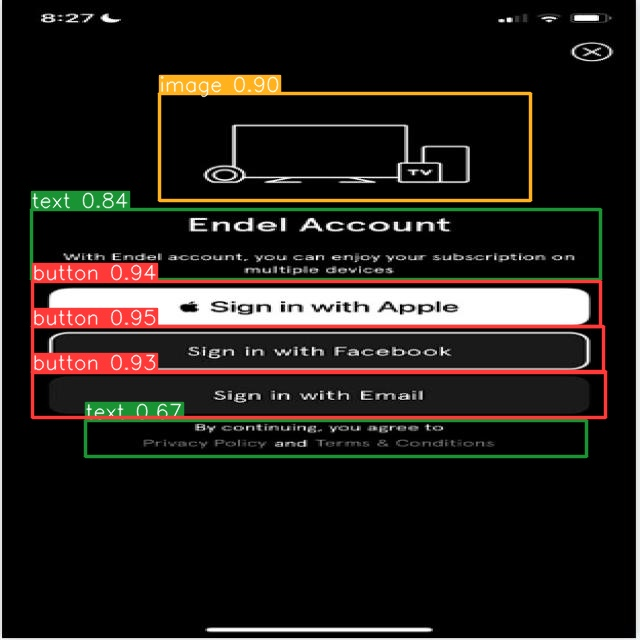

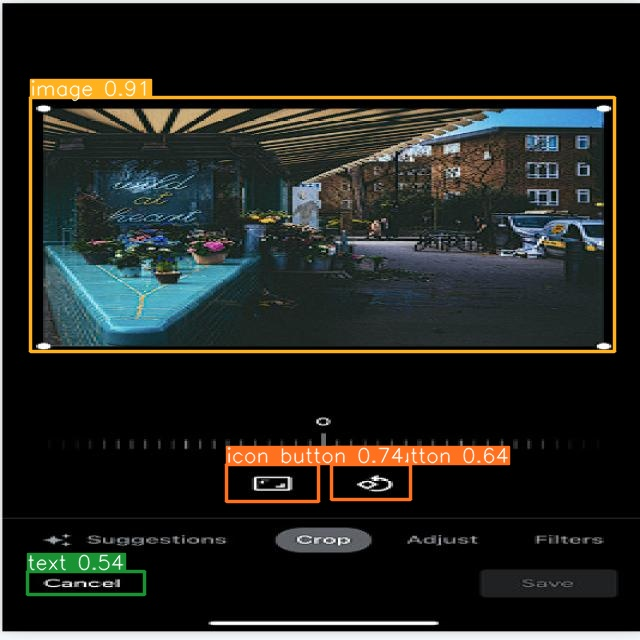

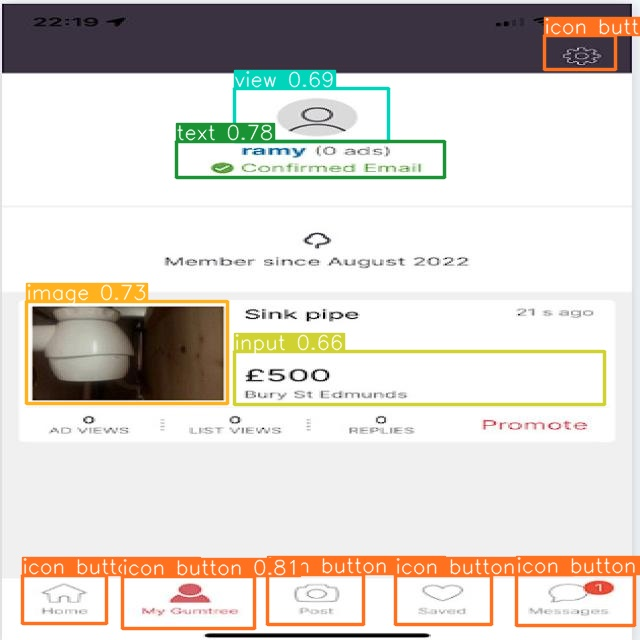

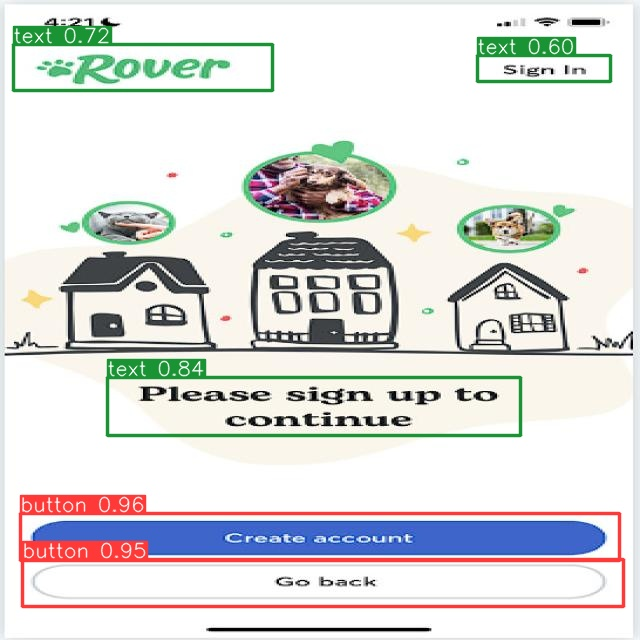

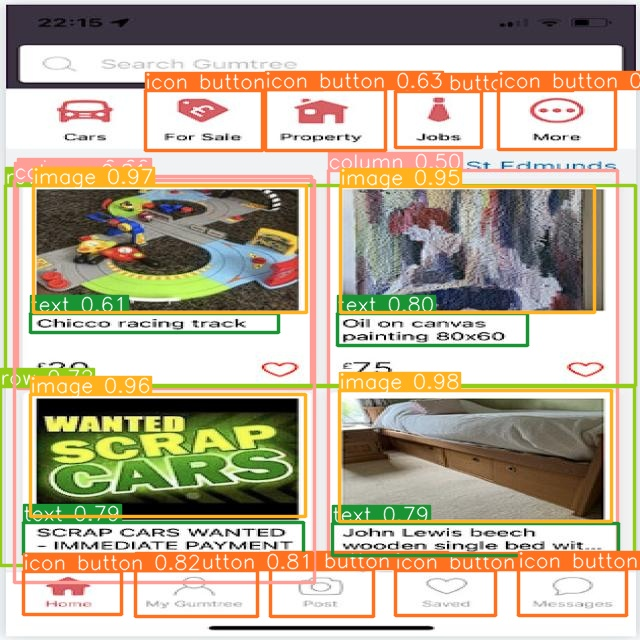

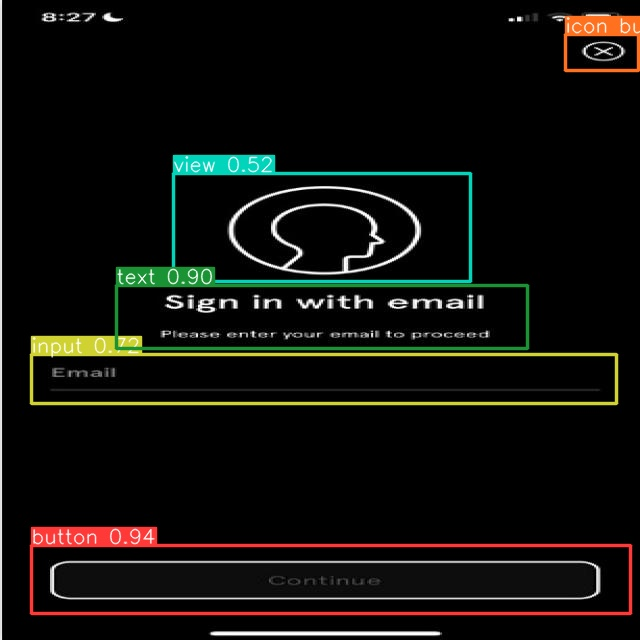

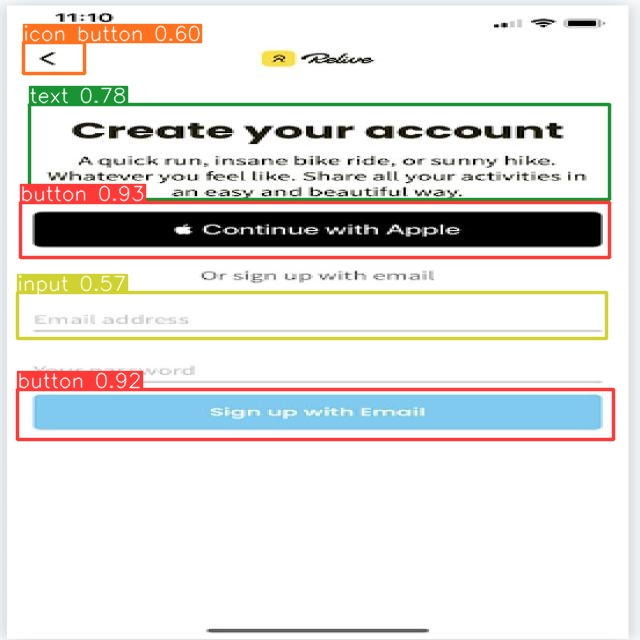

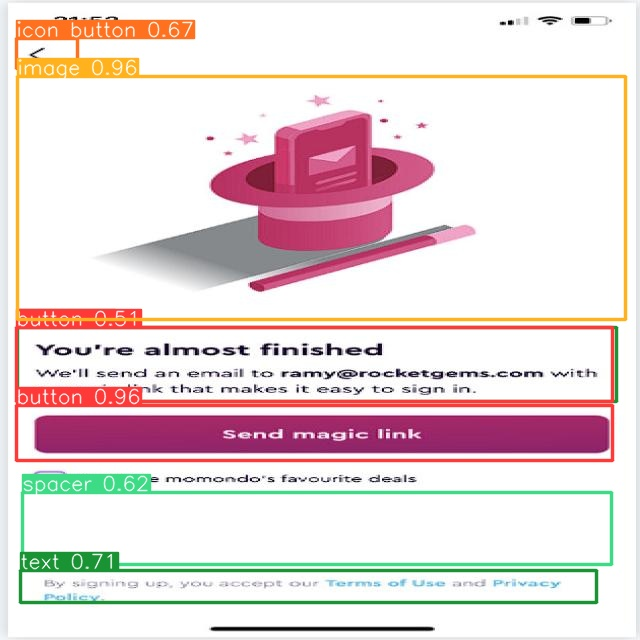

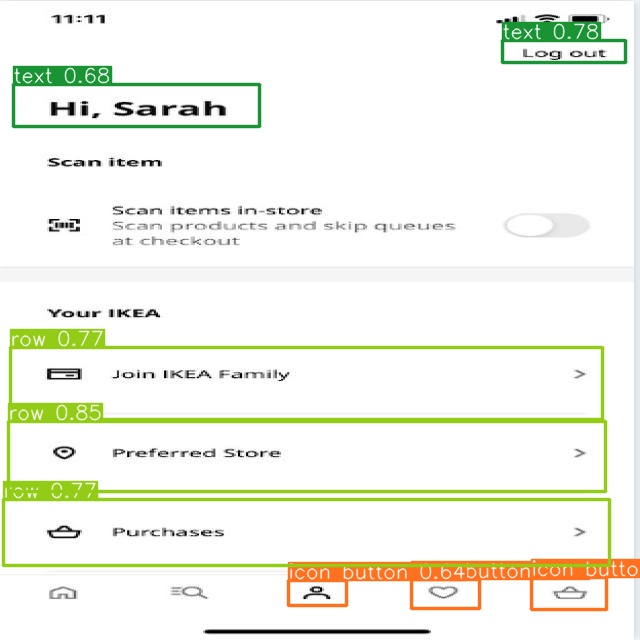

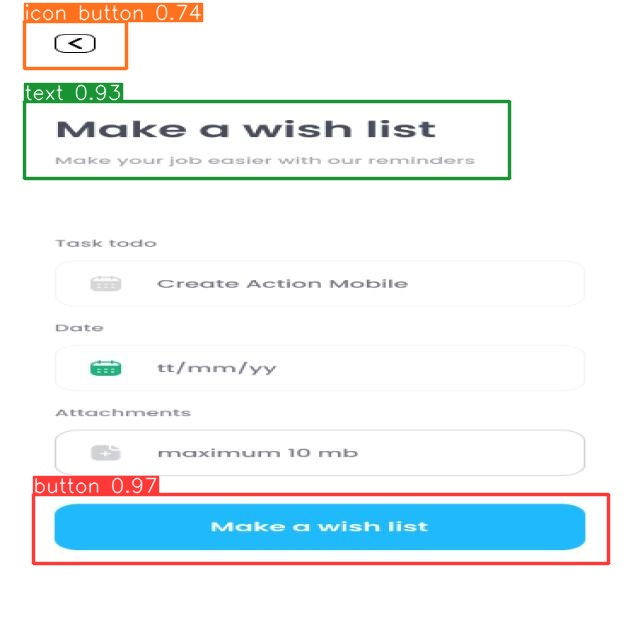

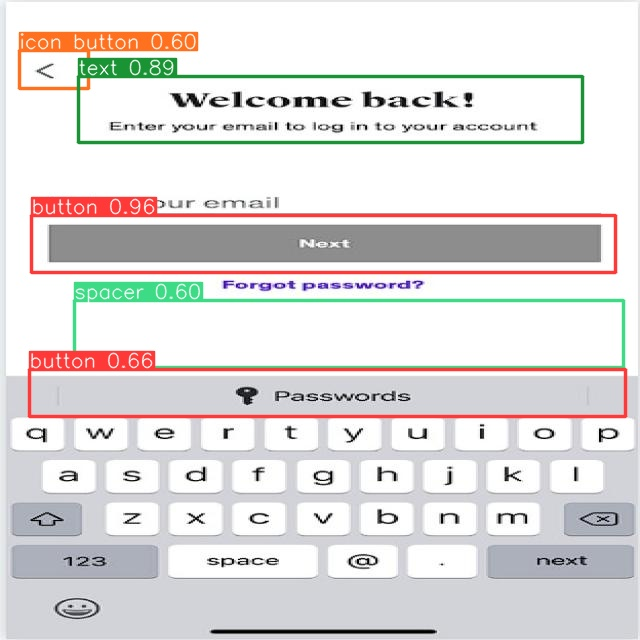

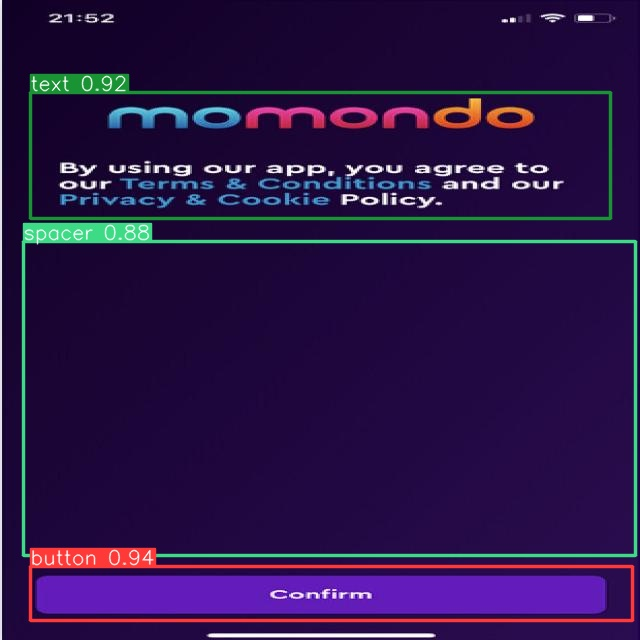

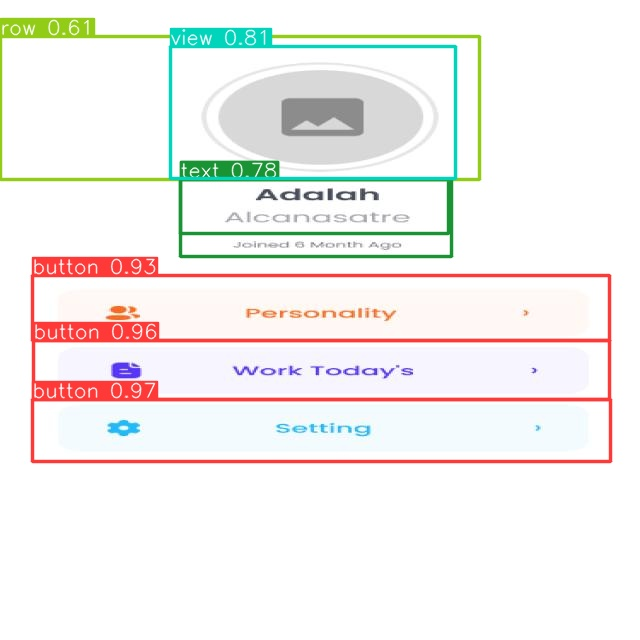

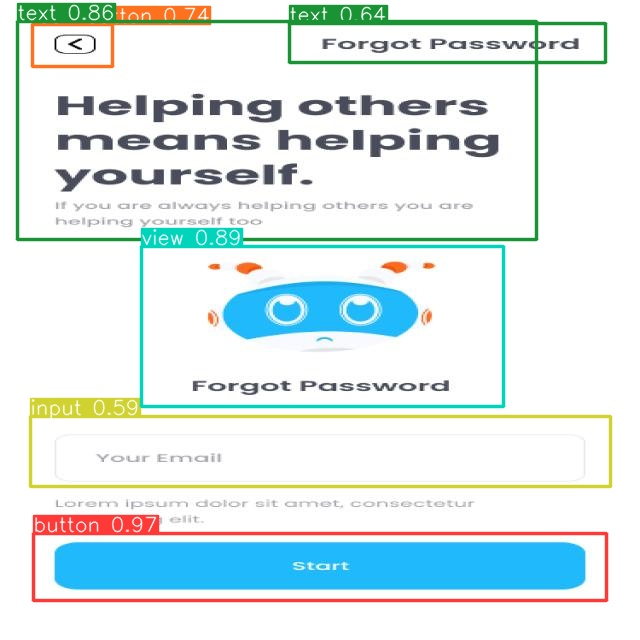

In [30]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/ultralytics/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, height = 600))
  print("\n")

In [31]:
from google.colab import files
files.download("/content/ultralytics/runs/detect/train2/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>